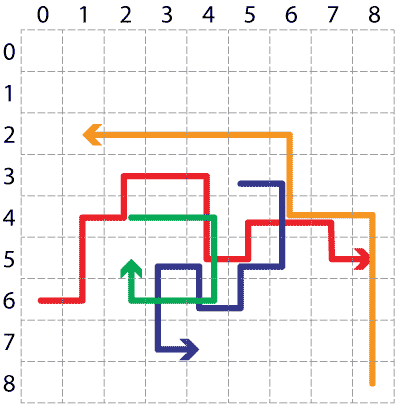

Izkazalo se je, da Marsovci včasih tudi koga ugrabijo. V tej nalogi bomo vadili reševanje.

Najprej celotna slika: čeprav so marsovske ladje okrogle, je smrdljivi kevder, v katerega zapirajo ugrabljene, pravokotne oblike. Vsaka soba (razen robnih) ima vrata v sosednje štiri. Vrata se vsakih deset sekund odprejo za trenutek, torej prehod skozi sobo vedno traja 10 sekund. (Ugrabljenci so omamljeni, zato kljub odpiranju vrat ne morejo nikamor.)

Vsako polno uro se marsovski stražarji teleportirajo v določene sobe in prehodijo določeno poti. Vse je vedno enako. Točne podatke bomo dobili od MOSSAD-a, primer pa je na sliki.

Kje so ugrabljenci, ne vemo zagotovo, prepričani pa smo, da v eni od sob, ki jih stražarji največkrat obiščejo. Na sliki sta dve takšni sobi, `(6, 4)` in `(4, 5)`; obiskani sta po trikrat.

<p style="clear:both">Reševalno operacijo bodo izvedli slovenski specialci. V istem trenutku, ko se v klet teleportirajo marsovci, se bodo tudi specialci teleportirali v sobo `(0, 0)`. Vsak bo šel po predvideni poti.</p>

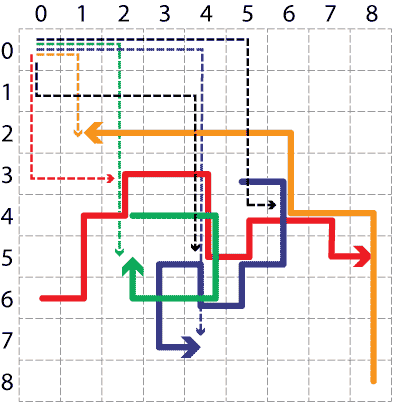

- Če specialec sreča marsovca, ga prime za ušesa (ali antene, bogve, kaj imajo) in ga zadrži v tej sobi.
- Če v sobi hkrati naletita na marsovca dva specialca, z njim ostane tisti specialec, ki je prej v seznamu. Ker vojska in hierarhija.
- Na koncu (ko so vsi specialci bodisi zaposleni z marsovci bodisi so končali svoje poti) morajo biti vsi marsovci prijeti, poleg tega pa mora biti po en specialec v vsaki sobi, kjer bi lahko bil ugrabljenec. Morebitni dodatni specialci so nepomembni.

Po koncu operacije teleportiramo specialce skupaj z ugrabljenci nazaj domov, pa še marsovce mimogrede ugrabimo. Zanalašč.

Primer uspešno načrtovane akcije je na sliki.

Simulacijo boste napisali za oceno 9. Za ostale ocene boste pisali funkcije, delno povezane s scenarijem; nekatere vam lahko pomagajo, nekatere morda tudi samo zato, da si znate kaj izpisati in izrisati.

Poti v nalogah so opisane v obliki `"vv^^^^>>v<"`, pri čemer posamični znaki pomenijo premike. Kot kaže slika, koordinata y narašča v smeri `v` in pada v smeri `^`. Poti marsovcev na sliki so torej takšne:

```python
poti_s_slike = [
    (0, 6, ">^^>^>>vv>^>>v>"),  # rdeči
    (2, 4, ">>vv<<^"),  # zeleni
    (5, 3, ">vv<v<^<vv>>"),  # modri
    (8, 8, "^^^^<<^^<<<<<"),  # oranžni
]
```

## Za oceno 6

- Napiši funkcijo `koraki(x, y, pot)`, ki prejme začetni koordinati in pot ter vrne zaporedje koordinat polj, ki jih ta, ki gre po tej poti, obišče.

    Klic `koraki(10, 80, "vv>>>^<")` vrne `[(10, 80), (10, 81), (10, 82), (11, 82), (12, 82), (13, 82), (13, 81), (12, 81)]`.

- Napiši funkcijo `cilj(x, y, pot)`, ki vrne polje, na katerem se pot konča.

    Klic `cilj(3, 6, "<<v")` vrne `(1, 7)`

- Napiši funkcijo `cilji(opisi)`, ki prejme seznam terk `(x, y, pot)` in vrne seznam končnih lokacij.

    Klic `cilji([(3, 6, "<<v"), (2, 1, "vv"), (5, 5, "")])` vrne `[(1, 7), (2, 3), (5, 5)]`.

- Napiši funkcijo `obiskana(x, y, pot)`, ki vrne množico vseh obiskanih polj.

    Klic `obiskana(4, 4, "^^>vv<<")` vrne `{(4, 4), (4, 3), (4, 2), (5, 2), (5, 3), (5, 4), (3, 4)}`.

- Napiši funkcijo `najveckrat_obiskana(opisi)`, ki prejme podobne argumente kot `cilji` in vrne množico največkrat obiskanih polj. Če isti stražar obišče isto polje večkrat, se to šteje za več obiskov.

    Klic `najveckrat_obiskana(poti_s_slike)`, kjer so `poti_s_slike` poti s slike, vrne `{(4, 5), (6, 4)}`.

### Rešitev

#### `koraki`

In [1]:
def koraki(x, y, pot):
    polja = [(x, y)]
    for c in pot:
        if c == ">":
            x += 1
        elif c == "<":
            x -= 1
        elif c == "v":
            y += 1
        elif c == "^":
            y -= 1
        polja.append((x, y))
    return polja

Ob tej nalogi je najprej vredna omembe naslednja pogosta slaba navada:

In [2]:
def koraki(x, y, pot):
    polja = [(x, y)]
    for c in pot:
        if c == ">":
            x += 1
            polja.append((x, y))
        elif c == "<":
            x -= 1
            polja.append((x, y))
        elif c == "v":
            y += 1
            polja.append((x, y))
        elif c == "^":
            y -= 1
            polja.append((x, y))
    return polja

To ni kul. Če v vsakem primeru dodamo terko `(x, y)`, naj bo ta `append` na koncu, za `if`-om.

Nekateri so si zaželeli (in želja se je izpolnila), da bi lahko reševali v Pythonu 3.10 in uporabili `switch`.

In [3]:
def koraki(x, y, pot):
    polja = [(x, y)]
    for c in pot:
        match c:
            case ">":
                x += 1
            case "<":
                x -= 1
            case "v":
                y += 1
            case "^":
                y -= 1
        polja.append((x, y))
    return polja

Prav, čeprav - meh. Neke velike prednosti ni. `switch` zasije, ko z njim počnemo kaj bolj zapletenega.

Bolj zanimivo je tako:

In [4]:
def koraki(x, y, pot):
    polja = [(x, y)]
    for c in pot:
        x, y = {">": (x + 1, y), "<": (x - 1, y),
                "^": (x, y - 1), "v": (x, y + 1)}[c]
        polja.append((x, y))
    return polja

To, da se da početi takšne stvari, je, ugibam, eden od razlogov, zakaj se Pythonu ni mudilo z uvajanjem `switch` oziroma `match`.

#### `cilj`

Funkcija `cilj` zgolj vrne zadnji element, ki ga pridela `korak`.

In [5]:
def cilj(x, y, pot):
    return koraki(x, y, pot)[-1]

#### `cilji`

Funkcija `cilji` le pokliče `cilj` za vsak opis poti.

In [6]:
def cilji(opisi):
    return [cilj(x, y, pot) for x, y, pot in opisi]

#### `obiskana`

Obiskana polja so množica polj, čez katera vodijo koraki.

In [7]:
def obiskana(x, y, pot):
    return set(koraki(x, y, pot))

#### `najveckrat_obiskana`

Pri tej funkciji se moramo izogniti pasti, da bi uporabili funkcijo `obiskana`. Ta je neuporabna, ker navodila pravijo: "Če isti stražar obišče isto polje večkrat, se to šteje za več obiskov." V množici pa se večkratni obiski izgubijo.

Tu povadimo stopnjevanje pridevnikov (emm, prislovov?). Uporabiti slovar bi bilo *praktično*. Uporabiti `defaultdict` bi bilo *bolj praktično*. Uporabiti `Counter` je najbolj *praktično*. 

In [8]:
def najveckrat_obiskana(opisi):
    c = Counter()
    for x, y, pot in opisi:
        c.update(koraki(x, y, pot))
    pogostosti = c.most_common()
    naj = pogostosti[0][1]
    return {polje for polje, f in pogostosti if f == naj}

## Ocena 7

Specialce označimo z velikimi črkami angleške abecede (A, B, C, D, E, F, G, H, I, J) in marsovce z malimi. Tako enih kot drugih je največ deset.

- Napiši funkcijo `situacija(specialci, marsovci, sirina, visina)`, ki prejme seznam koordinat specialcev, seznam koordinat marsovcev. Vrniti mora seznam seznamov množic ter širino in višino zemljevida. Če se seznam recimo imenuje `s`, bo `s[y][x]` množica vseh, ki se nahajajo v sobi s koordinatama (x, y).

    Klic 
    
    ```python
    situacija([(1, 0), (0, 2), (3, 1), (0, 2)],
              [(2, 2), (3, 1), (3, 1), (1, 1)], 4, 3)
    ```
    
    vrne

    ```python
    [[set(),       {'A'},  set(),     set()          ],
     [set(),       {'d'},  set(),     {'C', 'c', 'b'}],
     [{'D', 'B'},  set(),  {'a'},     set()          ]]
    ```

- Funkcija `znak(m)` prejme množico črk.

    - Če je množica prazna, funkcija vrne `"."`.
    - Če vsebuje en element, vrne ta element.
    - Če vsebuje več kot en element, vrne niz s številom elementov. Če je velikost množice 3, vrne `"3"`. Predpostaviti smeš, da velikost ne bo večja od 9.

- Funkcija `izris(polozaj)` prejme seznam seznamov množic, kakršnega vrne funkcija `situacija` in vrne niz z izpisom v naslednji obliki:

    ```text
    .A..
    .d.3
    2.a.
    ```

    Dejanski niz, ki ga vrne funkcija, je seveda, `".A..\n.d.3\n2.a."`, tole zgoraj je že njegov izpis.

- Funkcija `animacija0(x, y, pot, sirina, visina)` prejme začetne koordinate in pot ter vrne seznam nizov, ki predstavljajo situacije v posameznih časovnih korakih. Akter je predstavljen z znakom A (kot da gre za specialca). Parametra `sirina` in `visina` vsebujeta dimenzija kleti.

    Klic `animacija0(1, 1, "<^>>", 3, 3)` vrne `['...\n.A.\n...', '...\nA..\n...', 'A..\n...\n...', '.A.\n...\n...', '..A\n...\n...']`.
    
### Rešitev

#### `situacija`

Ta funkcija se je izkazala za kar zoprno. Recimo, da imamo:

In [9]:
sirina = 5
visina = 3

Prvi problem je bil, da takale inicializacija seznama:

In [10]:
polje = [[set()] * sirina] * visina

izgleda pravilna

In [11]:
polje

[[set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set()]]

vendar ni:

In [12]:
polje[2][1].add("A")

polje

[[{'A'}, {'A'}, {'A'}, {'A'}, {'A'}],
 [{'A'}, {'A'}, {'A'}, {'A'}, {'A'}],
 [{'A'}, {'A'}, {'A'}, {'A'}, {'A'}]]

V vseh elementih `polje` se nahaja ena in ista množica. Temu smo posvetili večji del predavanj o imenskih prostorih ([zapiski](https://ucilnica.fri.uni-lj.si/mod/page/view.php?id=7769)).

Polje je potrebno inicializirati z

In [13]:
polje = []
for y in range(visina):
    vrstica = []
    for x in range(sirina):
        vrstica.append(set())
    polje.append(vrstica)

In [14]:
polje

[[set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set()]]

In [15]:
polje[2][1].add("A")

polje

[[set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set()],
 [set(), {'A'}, set(), set(), set()]]

Ali s kakšno krajšo različico, kot je

In [16]:
polje = [[set() for _ in range(sirina)] for _ in range(visina)]

Bistveno je, da `set()` ne pokličemo le enkrat, temveč tolikokrat, kolikor množic potrebujemo.

Rešitev je potem

In [17]:
def situacija(specialci, marsovci, sirina, visina):
    polje = [[set() for _ in range(sirina)] for _ in range(visina)]
    for znak, (x, y) in zip("ABCDEFGHIJ", specialci):
        polje[y][x].add(znak)
    for znak, (x, y) in zip("abcdefghij", marsovci):
        polje[y][x].add(znak)
    return polje

Ne spreglejte, kako smo z `zip` poparili specialce in marsovce s črkami.

Precej študentov je namesto tega sestavljalo množice za vsako sobo posebej in potem iskalo, kdo spada vanjo:

In [18]:
def situacija(specialci, marsovci, sirina, visina):
    polje = []
    for y in range(visina):
        vrstica = []
        for x in range(sirina):
            soba = set()
            for znak, (x0, y0) in zip("ABCDEFGHIJ", specialci):
                if x0 == x and y0 == y:
                    soba.add(znak)
            for znak, (x0, y0) in zip("abcdefghij", marsovci):
                if x0 == x and y0 == y:
                    soba.add(znak)
            vrstica.append(soba)
        polje.append(vrstica)
    return polje

To je nerodnejše, daljše in počasnejše. Če se ne spomnimo na `zip`, da vsak marsovec in specialec dobi pravo črko, pa je potrebno še veliko akrobacij, da določimo pravo črko za vsakega.

#### `znak`

Ta funkcija ni nič posebnega; potrebujemo jo le, da bi naslednje stekle gladkeje.

In [19]:
def znak(s):
    if not s:
        return "."
    if len(s) == 1:
        return next(iter(s))
    else:
        return str(len(s))

#### `izris`

Tudi `izris` ni nič posebnega. Da ne telovadimo z nizi, pokažimo kar, kako se to naredi z generatorji in `join`-om:

In [20]:
def izris(polozaj):
    return "\n".join("".join(znak(s) for s in vrstica) for vrstica in polozaj)

#### `animacija`

Tudi animacijo je preprosto narediti z izpeljanim seznamom. Brez njega pa tudi ni bistveno bolj zapleteno, le izris kličemo za vsak korak na poti. Seznam specialcev vsebuje trenutne koordinate, seznam marsovcev pa je prazen.

In [21]:
def animacija0(x, y, pot, sirina, visina):
    return [izris(situacija([(x, y)], [], sirina, visina))
            for x, y in koraki(x, y, pot)]

## Za oceno 8

- Funkcija `dopolnjeno(s, n)` prejme seznam `s`. Vrniti mora nov seznam dolžine `n` (pri čemer je `n` večji ali enak `len(s)`). Vrnjeni seznam vsebuje vse elemente `s`, ki jim sledi toliko ponovitev zadnjega elementa `s`, da je skupna dolžina enaka zahtevani, `n`.

    Klic `dopolnjeno(["Ana", "Berta", "Cilka"], 5)` vrne `["Ana", "Berta", "Cilka", "Cilka", "Cilka"]`.

- Funkcija `razporedi(specialci, marsovci)` prejme dva seznama, enega za specialce enega za marsovce. Vsak seznam je sestavljen iz trojk `(x, y, pot)`, ki opisuje gibanje enega od specialcev ali marsovcev. Funkcija vrne dva seznama enakih dolžin: njuna dolžina ustreza najdaljši poti, ki jo naredi katerikoli izmed specialcev ali marsovcev. Vsak element seznama ustreza eni časovni točki in vsebuje koordinate vseh specialcev oz. marsovcev v podanem trenutku.

    Za ilustracijo poglejmo klic
    
    ```python
    razporedi([(0, 2, ">>>"), (3, 3, "<v"), (4, 2, "")],
              [(1, 2, "^^<>>"), (1, 1, ">>")])
    ```

    Vrniti mora

    ```python
    ([[(0, 2), (3, 3), (4, 2)],
      [(1, 2), (2, 3), (4, 2)],
      [(2, 2), (2, 4), (4, 2)],
      [(3, 2), (2, 4), (4, 2)],
      [(3, 2), (2, 4), (4, 2)],
      [(3, 2), (2, 4), (4, 2)]],
     [[(1, 2), (1, 1)],
      [(1, 1), (2, 1)],
      [(1, 0), (3, 1)],
      [(0, 0), (3, 1)],
      [(1, 0), (3, 1)],
      [(2, 0), (3, 1)]])
    ```

    Najprej opazujmo prvi seznam iz para. Njegov prvi element vsebuje začetne položaje vseh specialcev, `[(0, 2), (3, 3), (4, 2)]`. Naslednji element vsebuje položaje specialcev po prvem koraku, `[(1, 2), (2, 3), (4, 2)]`: prvi se je premaknil desno, drugi levo, tretji nikamor, saj je njegova pot prazna. Tretji element vsebuje koordinate po drugem koraku in četrti element po tretjem. Peti in šesti element sta potem enaka četrtemu, saj se specialci premaknejo le trikrat (in še to le prvi); v zadnjih treh korakih se premikajo samo še marsovci.

    Drugi seznam iz para vsebuje enake podatke za marsovce.

- Funkcija `animacija(specialci, marsovci, sirina, visina)` prejme enake argumente kot `razporedi`, poleg tega pa še dimenzije kleti. Funkcija vrne animacijo v podobni obliki kot `animacija0`, vendar za vse specialce in marsovce.

    Klic 
    
    ```python
    
    animacija([(0, 2, ">>>"), (3, 3, "<v"), (4, 2, "")],
              [(1, 2, "^^<>>"), (1, 1, ">>")], 5, 5)
    ```

    vrne seznam, ki vsebuje naslednje nize

    ```text
    .....
    .b...
    Aa..C
    ...B.
    .....
    ```

    ```text
    .....
    .ab..
    .A..C
    ..B..
    .....
    ```

    ```text
    .a...
    ...b.
    ..A.C
    .....
    ..B..
    ```

    ```text
    a....
    ...b.
    ...AC
    .....
    ..B..
    ```

    ```text
    .a...
    ...b.
    ...AC
    .....
    ..B..
    ```

    ```text
    ..a..
    ...b.
    ...AC
    .....
    ..B..
    ```

- `prvo_srecanje(specialec, marsovec)` prejme dve trojki z začetnima koordinatama in potjo specialca in marsovca. Vrniti mora prvo polje, na katerem se srečata. Če se ne srečata nikoli, vrne `None`.

    Klic `prvo_srecanje((2, 1, ">>"), (1, 1, ">>>>>>"))` vrne `(4, 1)`: specialec se premika pred marsovcev, potem pa ga pričaka v zasedi v `(4, 1)`.

- `bingo(specialci, marsovec)` prejme podobne argumente kot prejšnja funkcija, le da namesto opisa enega specialca prejme opise več specialcev. Funkcija vrne koordinate polja, kjer bo nek specialec ujel marsovca, oziroma `None`, če se bo mali zeleni izmaknil.

    Klic 
    
    ```python
    bingo([(8, 12, ">>>>>>>>"), (10, 14, ">>>>>>>>"), (9, 13, ">>>>>>>>")],
          (12, 16, "^>^>^>^>^>"))
    ```

    vrne `(13, 14)`: marsovec bo po treh korakih na `(13, 14)` in ravno takrat se bo tam znašel specialec, ki začne na `(10, 14)` in se pomika desno.
    
### Rešitev

#### `dopolnjeno`

Funkcijo `dopolnjeno` je prišla prav v nadaljevanju, za `razporedi`. Poleg tega pa sem si zaželel, da jo sprogramirate zato, da malo povadimo tisto mantro, da funkcija ne sme kar tako, nepooblaščeno, spreminjati argumentov.

Tole je narobe:

In [22]:
def dopolnjeno(s, n):
    while len(s) < n:
        s.append(s[-1])
    return s

Funkcija mora vrniti podaljšani seznam, ne da bi podaljševala podani seznam.

Tole je prav:

In [23]:
def dopolnjeno(s, n):
    return s + [s[-1]] * (n - len(s))

Lahko pa tudi tako:

In [24]:
def dopolnjeno(s, n):
    return s + s[-1:] * (n - len(s))

#### `razporedi`

Tale je bila kar zoprna, ker je bilo treba malo manipulirati z več seznami.

Najprej se je lotimo na dolgo - brez kakršnihkoli izpeljanih seznamov in podobnih trikov. Bistvene pripombe so napisane kar v komentarjih.

In [25]:
def razporedi(specialci, marsovci):
    # Ugotovimo največje število korakov; ta je za 1 daljše od najdaljše poti
    cas = 0
    for x, y, pot in specialci + marsovci:
        if len(pot) > cas:
            cas = len(pot)
    cas += 1
    
    # Pripravimo sezname koordinat, podaljšane do dolžine najdaljše
    spec_koraki = []
    for x, y, pot in specialci:
        spec_koraki.append(dopolnjeno(koraki(x, y, pot), cas))

    mars_koraki = []
    for x, y, pot in marsovci:
        mars_koraki.append(dopolnjeno(koraki(x, y, pot), cas))

    # Obrnemo seznama - stolpci (koordinate v posameznem trenutku)
    # postanejo vrstice
    spec = []
    mars = []
    for t in range(cas):
        if spec_koraki:  # "napaka" v testih; glej besedilo
            spec_koord = []
            for specialec in spec_koraki:
                spec_koord.append(specialec[t])
            spec.append(spec_koord)

        if mars_koraki:  # "napaka" v testih; glej besedilo
            mars_koord = []
            for marsovec in mars_koraki:
                mars_koord.append(marsovec[t])
            mars.append(mars_koord)

    return spec, mars

Testi so bili ... ne ravno napačni temveč vsaj nerodni. Kaj naj bi vrnil tale klic?

```python
razporedi([(0, 2, ">>>"), (3, 3, "<v"), (4, 2, "")], []))
```

Tole?

```text
([[(0, 2), (3, 3), (4, 2)],
  [(1, 2), (2, 3), (4, 2)],
  [(2, 2), (2, 4), (4, 2)],
  [(3, 2), (2, 4), (4, 2)]],
 [[],
  [],
  [],
  []]),
```

Ali tole?

```text
([[(0, 2), (3, 3), (4, 2)],
  [(1, 2), (2, 3), (4, 2)],
  [(2, 2), (2, 4), (4, 2)],
  [(3, 2), (2, 4), (4, 2)]],
 [])
```

Navodila o tej situaciji niso govorila. Bolj logično bi bilo prvo, saj imajo Marsovci še vedno štiri časovne točke, le seznami znotraj njih so dolgi toliko, kolikor je pač Marsovcev, torej 0. Testi pa so predpostavili drugo. Zakaj? V bistvu zato, ker je moja prva rešitev vrnila takšen rezultat (in rešitve, ki so jih napisali asistenti, najbrž tudi), sam pa se s tem vprašanjem nisem ukvarjal. Študenti so pisali zaradi vseh mogočih drugih stvari, ta pa ni zmotila nikogar, zato o tem nisem začel razmišljati do trenutka, ko sem pripravil gornjo rešitev in bil prisiljen vanjo dodati dva nepotrebna `if`-a.

Skrajšajmo to rešitev.

In [26]:
def razporedi(specialci, marsovci):
    cas = 1 + max((len(pot) for x, y, pot in specialci + marsovci), default=0)
    spec_koraki = [dopolnjeno(koraki(x, y, pot), cas) for x, y, pot in specialci]
    mars_koraki = [dopolnjeno(koraki(x, y, pot), cas) for x, y, pot in marsovci]
    return ([list(x) for x in zip(*spec_koraki)],
            [list(x) for x in zip(*mars_koraki)])

Prva vrstica, očitno, najde najdaljšo pot. Drugi dve sestavita dopolnjena seznama, zadnja obrne stolpce v vrstice. Naj razume, kdor če.

Kar napredek, ne? V zadnji me neskončno iritira, da ne morem napisati kar `return zip(*spec_koraki), zip(*mars_koraki)`. To je pač zato, ker `zip` vrača terke,, naloga pa hoče terke.

#### `animacija`

`animacija`, je funkcija z dolgim opisom in kratko rešitvijo: izrisati je potrebno vse situacije.

In [27]:
def animacija(specialci, marsovci, sirina, visina):
    spec_razp, mars_razp = razporedi(specialci, marsovci)
    return [izris(situacija(spec, mars, sirina, visina))
            for spec, mars in zip(spec_razp, mars_razp)]

#### `prvo_srecanje`

Najprej trivialna rešitev: pokličemo funkcijo `bingo`, ki pričakuje seznam specialcev in marsovca. Seznam specialcev je pač seznam, ki vsebuje (edinega) specialca.

In [28]:
def prvo_srecanje(specialec, marsovec):
    return bingo([specialec], marsovec)

Po tem moramo seveda napisati še funkcijo `bingo`. To nam sicer tako ali tako ne uide, vseeno pa za začetek napišimo `prvo_srecanje`. Ta funkcija je namreč lažja kot `bingo` in lahko služi kot "ogrevanje" zanjo.

Naprej si bomo pripravili seznam vseh koordinat, ki jih prehodita specialec in marsovec. To lahko storimo tako

```python
    # Prva dva argumenta sta koordinati, drugi je pot
    korakis = koraki(specialec[0], specialec[1], specialec[2])
    korakim = koraki(marsovec[0], marsovec[1], marsovec[2])
```

ali tako

```python
    x, y, pot = specialec
    korakis = koraki(x, y, pot)

    x, y, pot = marsovec
    korakim = koraki(x, y, pot)
```

Drugo je boljše, ker ne potrebuje komentarja. Lepa koda brez komentarja je vedno boljša od grde kode, ki jo je potrebno razložiti.

OK, popustil bi pri tem:

```python
    korakis = koraki(*specialec)
    korakim = koraki(*marsovec)
```

Je pa le toliko krajše, da se splača. V naslednjih funkcijah bomo torej delali tako. Če se še nismo naučili poprej: `koraki(specialec)` pomeni, da podamo kot argument (terko) `specialec`, `koraki(*specialec)` pa pomeni, da podamo kot argumente vse elemente (terke) `specialec`.

Rešitev je takšna. Najprej sestavimo seznam polj, po katerih bosta hodila marsovec in specialec. Potem gremo po parih istoležnih elementov in če sta polje kdaj enaki, vrnemo koordinati.

Nato je potrebno poskrbeti še za primer, ko sta poti različno dolgi. Če se prvi ustavi marsovec, se moramo vprašati, ali so njegove koordinate kje na ostanku specialčeve poti - preveriti moramo korakis od len(korakim) naprej. Če se prvi ustavi specialec, preverimo, ali bo marsovec naletel nanj na ostanku svoje poti. Katera pot je v resnici krajša, nam ni potrebno preverjati: ena od rezin bo pač vedno prazna.

In [29]:
def prvo_srecanje(specialec, marsovec):
    korakis = koraki(*specialec)
    korakim = koraki(*marsovec)
    for koords, koordm in zip(korakis, korakim):
        if koords == koordm:
            return koordm
    if koordm in korakis[len(korakim):]:
        return koordm
    if koords in korakim[len(korakis):]:
        return koords
    return None

#### `bingo`

In [30]:
def bingo(specialci, marsovec):
    korakiss = [koraki(*specialec) for specialec in specialci]
    korakim = koraki(*marsovec)

    for i, koordm in enumerate(korakim):
        for korakis in korakiss:
            if korakis[min(i, len(korakis) - 1)] == koordm:
                return koordm
    for korakis in korakiss:
        if koordm in korakis[i:]:
            return koordm
    return None

Najprej si pripravimo seznam seznamov, ki vsebuje vse korake specialcev; poimenovali smo ga `korakiss`, kot množino `korakis` (slongleščina). `korakiss` je torej seznam senzamov, kakršen je bil `korakis`.

Potem korakamo po marsovčevi poti in vemo tudi, na katerem koraku smo. Za vsak korak gremo čez vse `korakis`-e iz `korakiss` (se pravi čez vse specialce) in preverimo, če je specialec v tem, `i`-tem trenutku slučajno v isti sobi kot marsovec. Če, potem je ujet.

Pomemben trik tule je, kako odkrijemo specialčevo polje: `korakis[min(i, len(korakis) - 1)]`. Zanima nas, kje je specialec v trenutku `i`. Če je `i` manjši od dolžine specialčeve poti, nas zanima element s tem indeksom, sicer pa zadnji element, saj je specialec že zaključil pot in preži tam.

Če se ta zanke izteče neuspešno, je marsovec nekje obstal. Če bo kje ujet, bo ujet na tem polju. Gremo torej čez vse specialce in pogledamo, ali je v ostanku seznama katerega izmed specialcev (`korakis[i:]`, torej po `i`-tem koraku!) to marsovčevo polje. Če je, smo ga ujeli.

Če ne, se je izmuznil.

## Ocena 9

Napiši funkcijo `simulacija(specialci, marsovci)`, ki prejme seznam poti specialcev (le nize, saj vsi specialci začnejo na `(0, 0)`!) in sezname s trojkami, ki opisujejo gibanje marsovcev. Vrniti mora `True`, če je reševalna akcija uspešna in `False`, če ni. Kako poteka akcija in kdaj je uspešna, je opisano v uvodu.

### Rešitev


Funkcije, ki ste jih napisali do sem, so bile priprava za simulacijo. Morda pridejo prav, morda pa nam pomagajo razmišljati.

Funkcija `prvo_srecanje` je marsikoga zavedla - mislil je, da jo je pametno uporabiti za simulacijo. Ni. Simulacijo je potrebno poganjati po korakih, prvo srečanje med nekim specialcem in marsovcem pa se lahko zgodi tudi, ko je ta specialec v resnici že zaseden z drugim marsovcem. Podobno je z `bingo`. Tidve sta uporabni za zgled; simulacijo je možno sprogramirati v podobnem slogu.

Funkcijo bomo rešil z `razporedi` in brez nje. Osnovni problem bo obakrat, kako vedeti, kdo je še aktiven.

Najprej z `razporedi`. Tam je brisanje "deaktiviranih" specialcev in marsovcev iz seznamov zoprno, ker se ne nahajajo v vrsticah (kar bi bil en seznam) temveč v stolpcih (istoležni elementi več seznamov). Zato je vsaj meni tu lažje vzdrževati seznam `bool`-ov, ki vsebuje `True`, če je pripadajoči specialec ali marsovec aktiven, in `False`, če ni.

In [31]:
def simulacija(specialci, marsovci):
    spec_poz, mars_poz = razporedi([(0, 0, spec) for spec in specialci],
                                   marsovci)
    spec_aktivni = [True] * len(specialci)
    mars_aktivni = [True] * len(marsovci)
    for specs, marss in zip(spec_poz, mars_poz):
        for speci, spec in enumerate(specs):
            for marsi, mars in enumerate(marss):
                if spec_aktivni[speci] and mars_aktivni[marsi] and spec == mars:
                    spec_aktivni[speci] = mars_aktivni[marsi] = False

    return not any(mars_aktivni) and \
           najveckrat_obiskana(marsovci) <= {poz for poz, aktiven in zip(specs, spec_aktivni) if aktiven}


Najprej pokličemo `razporedi` in pripravimo seznama `True`-jev, ki odražata, da so vsi specialci in marsovci aktivni.

Potem gremo vzporedno prek koordinat marsovcev in specialcev. V notranjih dveh zankah gremo prek koordinat specialcev in marsovcev. Če sta specialec in marsovec aktivna in na istih koordinatah, postanega neaktivna. Specialce in marsovce oštevilčimo, da lahko beremo (in tudi spreminjamo) njuno aktivnost.

Operacija je uspešna, če ni aktivnih marsovcev in so največkrat obiskana polja podmnožica končnih polj aktivnih specialcev.

Rešitev brez `razporedi` zahteva nekoliko več spretnosti.

Funkciji `prvo_srecanje` in `bingo` sta nas naučili, da je potrebno sestaviti sezname korakov. Seznama `korakiss` in `korakims` bosta vsebovala vse poti vseh specialcev in marsovcev, ki so še aktivni. Ob ujetju marsovca bomo preprosto pobrisali pot specialca in marsovca iz seznama.

V zanki bomo izvedli toliko korakov, kolikor je dolga najdaljša pot kateregakoli. Šli bomo prek vseh specialcev in znotraj tega prek vseh marsovcev. Naletivši na dva z enakimi koordinatami bomo pobrisali pripadajoča elementa `korakiss` in `korakims`. Za to brisanje bomo potrebovali indekse obeh. Indeksa marsovca (v notranji zanki) bomo pridobili z `enumerate`. Specialci bodo zahtevali zanko `while` - bomo videli, zakaj.

In [32]:
def simulacija(specialci, marsovci):
    korakiss = [koraki(0, 0, specialec) for specialec in specialci]
    korakims = [koraki(*marsovec) for marsovec in marsovci]
    for i in range(max(len(x) for x in korakiss + korakims)):
        speci = 0
        while speci < len(korakiss):
            korakis = korakiss[speci]
            for marsi, korakim in enumerate(korakims):
                if korakis[min(i, len(korakis) - 1)] == korakim[min(i, len(korakim) - 1)]:
                    del korakims[marsi]
                    del korakiss[speci]
                    break
            else:
                speci += 1
    return not korakims and najveckrat_obiskana(marsovci) <= {korakis[-1] for korakis in korakiss}


Brisanje marsovca je preprosto: `del korakims[marsi]`. S specialcem je podobno. Zanko prek marsovcev prekinemo z `break`. Znotraj ranks `for ... in korakims` preverjamo, ali bo specialec z indeksom `speci` ujel kakega marsovca. Če ga ujame, ne smemo pregledovati, ali bo morda še katerega drugega: ne bo, ker je že tega.

Navidez smo se ujeli v past: znotraj zanke `for` prek nekega seznama ne smemo brisati elementov tega seznama, saj bo zanka, kot smo že nekoč spoznali, v tem primeru preskakovala elemente. V resnici tu te nevarnosti ni, saj smo zanko po brisanju tako ali tako prekinili.

Pač pa moramo biti na to pozorni v zanki prek specialcev. To ne sme biti zanka `for`, ker bi po brisanju enega specialca zanka preskočila naslednjega. Zato tu uporabimo `while`: `speci` je indeks specialca. Zanka teče, dokler je indeks manjši od števila specialcev. Indeks se poveča le, če *ne pobrišemo* specialca - torej v primeru, da se zanka prek marsovcev ni končala z `break`.

Akcija je uspešna, če na koncu ni več nobenega aktivnega marsovca in če je množica največkrat obiskanih polj podmnožica zadnjih koordinat vseh specialcev, ki so še aktivni.

Ta rešitev je tako kratka po zaslugi nekaterih spretnosti. Najprej, prejšnje funkcije so nas naučile, da se splača delati sezname korakov. Odkrili smo trik, s katerim pridemo do `i`-tega elementa (indeksiranje z `min`). Predvsem pa je koristilo, da smo uporabili pravi zanki in se spomnili na `else` po zanki `for`. Brez teh trikov ... bi se funkcija pač zapletla.


## Ocena 10

Napiši funkcijo `strategija(marsovci)`, ki vrne optimalno strategijo operacije. Argument so poti marsovcev. Rezultat mora biti seznam poti vseh specialcev.

- Operacija mora biti uspešna.
- Vsakega marsovca je potrebno zgrabiti čimprej. (Ideja: za vsakega marsovca je zadolžen en specialec in ta ga mora zgrabiti, čim je mogoče.)
- Tudi do vseh ugrabljenih je potrebno priti čimprej.
- Specialcev naj bo le toliko, kot jih potrebujemo.
- Poti specialcev naj nimajo nepotrebnih repov. Pri prejšnji nalogi smo ignorirali morebitno predvideno pot specialca po tem, ko sreča marsovca in obstani z njim; v strategiji, ki jo vrne ta funkcija, naj odvečnih repov ne bo.

Testi bodo uporabljali vašo funkcijo `simulacija`, zato mora biti ta pravilno napisana. Ko bomo testirali vašo strategijo, pa bomo zamenjali simulacijo s svojo. Lahko se vam torej zgodi, da bodo testi poročali, da je naloga uspešno rešena za oceno 10, v resnici pa boste dobili oceno 9. (Taki situaciji se poskuašmo izogniti, a resnici na ljubo pri večini predmetov pravzaprav nikoli ob oddaji izdelka ne veste, ali je vaša rešitev res pravilna in kakšno oceno boste dobili.)

###  Rešitev

Gremo po poti vsakega marsovca. Če je v nekem trenutku `t` za `t` korakov od (0, 0), je to polje, kjer ga bomo ujeli; zanko prekinemo. Če pride zanka do konca, ga bomo ujeli (šele) na polju, kjer se ustavi. Med specialce dodamo nekoga, ki bo šel ponj.

Nato dodamo specialce, ki gredo po ugrabljence.

Na koncu specialce uredimo po dolžini. Tako preprečimo, da bi se specialec, ki ima daljšo pot predčasno ustavil, ker se znajde na polju, kamor je poslan specialec z daljšo nalogo.

In [33]:
def strategija(marsovci):
    specialci = []
    for marsovec in marsovci:
        for t, (x, y) in enumerate(koraki(*marsovec)):
            if x + y <= t:
                break
        specialci.append("v" * y + ">" * x)
        
    specialci += ["v" * y + ">" * x for x, y in najveckrat_obiskana(marsovci)]
    
    return sorted(specialci, key=len)


## Celotna rešitev

Za pregled in vtis je tu še rešitev celotne naloge.

In [34]:
## Za oceno 6

def koraki(x, y, pot):
    polja = [(x, y)]
    for c in pot:
        x, y = {">": (x + 1, y), "<": (x - 1, y),
                "^": (x, y - 1), "v": (x, y + 1)}[c]
        polja.append((x, y))
    return polja


def cilj(x, y, pot):
    return koraki(x, y, pot)[-1]


def cilji(opisi):
    return [cilj(x, y, pot) for x, y, pot in opisi]


def obiskana(x, y, pot):
    return set(koraki(x, y, pot))


def najveckrat_obiskana(opisi):
    c = Counter()
    for x, y, pot in opisi:
        c.update(koraki(x, y, pot))
    pogostosti = c.most_common()
    naj = pogostosti[0][1]
    return {polje for polje, f in pogostosti if f == naj}


## Za oceno 7

def situacija(specialci, marsovci, sirina, visina):
    polje = [[set() for _ in range(sirina)] for _ in range(visina)]
    for znaki, pozicije in (("ABCDEFGHIJ", specialci), ("abcdefghij", marsovci)):
        for c, (x, y) in zip(znaki, pozicije):
            polje[y][x].add(c)
    return polje


def znak(s):
    if not s:
        return "."
    if len(s) == 1:
        return next(iter(s))
    else:
        return str(len(s))

    
def izris(polozaj):
    return "\n".join("".join(znak(s) for s in vrstica) for vrstica in polozaj)


def animacija0(x, y, pot, sirina, visina):
    return [izris(situacija([(x, y)], [], sirina, visina))
            for x, y in koraki(x, y, pot)]


## Za oceno 8

def dopolnjeno(polja, n):
    return polja + polja[-1:] * (n - len(polja))

def razporedi(specialci, marsovci):
    spec_koraki = [koraki(x, y, pot) for x, y, pot in specialci]
    mars_koraki = [koraki(x, y, pot) for x, y, pot in marsovci]
    cas = max((len(x) for x in spec_koraki + mars_koraki), default=0)
    spec_koraki = [dopolnjeno(k, cas) for k in spec_koraki]
    mars_koraki = [dopolnjeno(k, cas) for k in mars_koraki]
    return list(map(list, zip(*spec_koraki))), list(map(list, zip(*mars_koraki)))

def animacija(specialci, marsovci, sirina, visina):
    return [izris(situacija(spec, mars, sirina, visina))
            for spec, mars in zip(*razporedi(specialci, marsovci))]

def prvo_srecanje(opis1, opis2):
    return bingo([opis1], opis2)

def bingo(specialci, marsovec):
    korakiss = [koraki(*specialec) for specialec in specialci]
    korakim = koraki(*marsovec)

    for i, koordm in enumerate(korakim):
        for korakis in korakiss:
            if korakis[min(i, len(korakis) - 1)] == koordm:
                return koordm
    for korakis in korakiss:
        if koordm in korakis[i:]:
            return koordm
    return None


## Za oceno 9

def simulacija(specialci, marsovci):
    spec_poz, mars_poz = razporedi([(0, 0, spec) for spec in specialci],
                                   marsovci)
    spec_aktivni = [True] * len(specialci)
    mars_aktivni = [True] * len(marsovci)
    for specs, marss in zip(spec_poz, mars_poz):
        for speci, spec in enumerate(specs):
            for marsi, mars in enumerate(marss):
                if spec_aktivni[speci] and mars_aktivni[marsi] and spec == mars:
                    spec_aktivni[speci] = mars_aktivni[marsi] = False

    return not any(mars_aktivni) and \
           najveckrat_obiskana(marsovci) <= {poz for poz, aktiven in zip(specs, spec_aktivni) if aktiven}


## Za oceno 10

def strategija(marsovci):
    specialci = []
    for marsovec in marsovci:
        for i, (x, y) in enumerate(koraki(*marsovec)):
            if x + y <= i:
                break
        specialci.append("v" * y + ">" * x)
    specialci += ["v" * y + ">" * x for x, y in najveckrat_obiskana(marsovci)]
    return sorted(specialci, key=len)